In [3]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np


In [67]:
def ForwardEulerSolver(i_initial, s_initial, p_1, p_2, p_3, p_4, c, gamma, tRange, step_size):
    
    s_1 = [s_initial]
    i_1 = [i_initial]
    r_1 = [0]
    
    s_2 = [s_initial]
    i_2 = [i_initial]
    r_2 = [0]
    
    s_3 = [s_initial]
    i_3 = [i_initial]
    r_3 = [0]
    
    s_4 = [s_initial]
    i_4 = [i_initial]
    r_4 = [0]
    
    t = [0]
    
    p = [(p_1 * s_1[0] + p_2 * s_2[0] + p_3 * s_3[0] + p_4 * s_4[0]) / (s_1[0] + s_2[0] + s_3[0] + s_4[0])]
    
    # Find number of steps until you reach tRange and loop through them
    for n in range(int(tRange / step_size)):

        
        # S1
        ds_1 = - c * s_1[n] * p_1 * (i_1[n] + i_2[n] + i_3[n] + i_4[n])
        s_nPlusOne = s_1[n] + step_size * ds_1
        s_1.append(s_nPlusOne)
        
        di_1 = p_1 * s_1[n] * c * (i_1[n] + i_2[n] + i_3[n] + i_4[n]) - gamma * i_1[n]
        i_nPlusOne = i_1[n] + step_size * di_1
        i_1.append(i_nPlusOne)
        
        dr_1 = gamma * i_1[n]
        r_nPlusOne = r_1[n] + step_size * dr_1
        r_1.append(r_nPlusOne)
        
        # S2
        ds_2 = - c * s_2[n] * p_2 * (i_1[n] + i_2[n] + i_3[n] + i_4[n])
        s_nPlusOne = s_2[n] + step_size * ds_2
        s_2.append(s_nPlusOne)
        
        di_2 = p_2 * s_2[n] * c * (i_1[n] + i_2[n] + i_3[n] + i_4[n]) - gamma * i_2[n]
        i_nPlusOne = i_2[n] + step_size * di_2
        i_2.append(i_nPlusOne)
        
        dr_2 = gamma * i_2[n]
        r_nPlusOne = r_2[n] + step_size * dr_2
        r_2.append(r_nPlusOne)
        
        # S3
        ds_3 = - c * s_3[n] * p_3 * (i_1[n] + i_2[n] + i_3[n] + i_4[n])
        s_nPlusOne = s_3[n] + step_size * ds_3
        s_3.append(s_nPlusOne)
        
        di_3 = p_3 * s_3[n] * c * (i_1[n] + i_2[n] + i_3[n] + i_4[n]) - gamma * i_3[n]
        i_nPlusOne = i_3[n] + step_size * di_3
        i_3.append(i_nPlusOne)
        
        dr_3 = gamma * i_3[n]
        r_nPlusOne = r_3[n] + step_size * dr_3
        r_3.append(r_nPlusOne)
        
        # S4
        ds_4 = - c * s_4[n] * p_4 * (i_1[n] + i_2[n] + i_3[n] + i_4[n])
        s_nPlusOne = s_4[n] + step_size * ds_4
        s_4.append(s_nPlusOne)
        
        di_4 = p_4 * s_4[n] * c * (i_1[n] + i_2[n] + i_3[n] + i_4[n]) - gamma * i_4[n]
        i_nPlusOne = i_4[n] + step_size * di_4
        i_4.append(i_nPlusOne)
        
        dr_4 = gamma * i_4[n]
        r_nPlusOne = r_4[n] + step_size * dr_4
        r_4.append(r_nPlusOne)
        
                
        nextp = (p_1 * s_1[n+1] + p_2 * s_2[n+1] + p_3 * s_3[n+1] + p_4 * s_4[n+1]) / (s_1[n+1] + s_2[n+1] + s_3[n+1] + s_4[n+1])
        p.append(nextp)
        
        
        t_nPlusOne = t[n] + step_size
        t.append(t_nPlusOne)
        
    i_1 = np.array(i_1)
    i_2 = np.array(i_2)
    i_3 = np.array(i_3)
    i_4 = np.array(i_4)
    t = np.array(t)
    return [t,i_1,i_2,i_3,i_4,s_1,s_2,s_3,s_4,p]

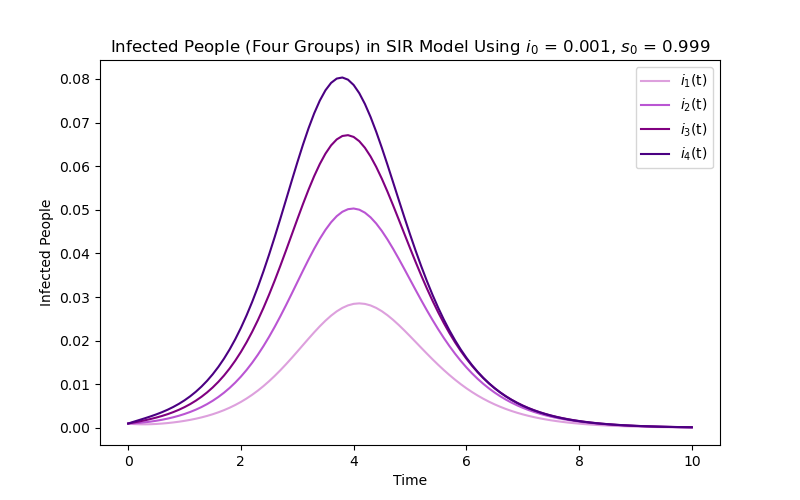

In [89]:
# Problem A
fig, axs = plt.subplots(1, figsize=(8, 5))



i_initial = 0.001
s_initial = 0.999

Beta = 3
Gamma = 2
t_range = 10
One_Over_R_naught = Gamma / Beta

step_size = 0.1

p1 = 1
p2 = 2
p3 = 3
p4 = 4

c = 0.45

gamma = 3

t0,I1,I2,I3,I4,S1,S2,S3,S4,p = ForwardEulerSolver(i_initial, s_initial, p1, p2, p3, p4, c, gamma, t_range, step_size)


plt.plot(t0, I1, label='$i_1$(t)', color='plum')
plt.plot(t0, I2, label='$i_2$(t)', color='mediumorchid')
plt.plot(t0, I3, label='$i_3$(t)', color='purple')
plt.plot(t0, I4, label='$i_4$(t)', color='indigo')



plt.xlabel("Time")
plt.ylabel("Infected People")
plt.legend()
plt.title("Infected People (Four Groups) in SIR Model Using $i_0$ = 0.001, $s_0$ = 0.999")


plt.savefig('problem2InfectedGraph.png')

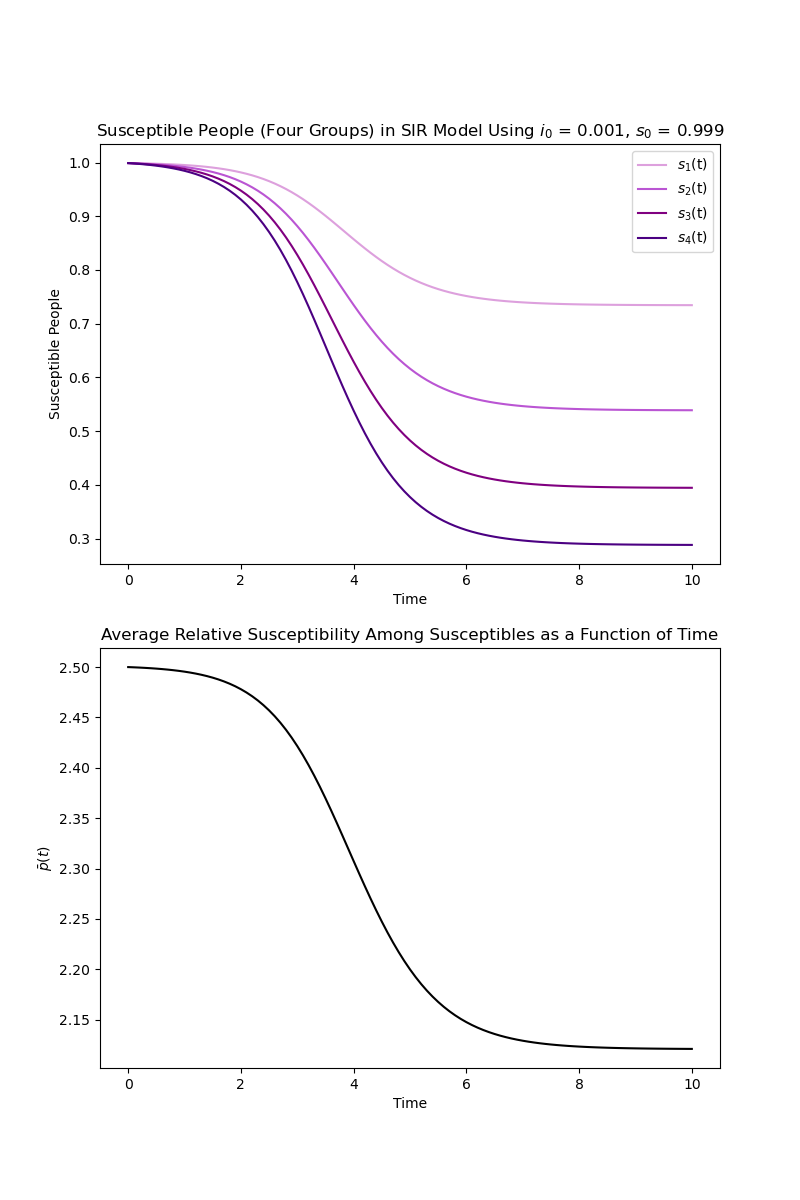

In [90]:
fig, axs = plt.subplots(2, figsize=(8, 12))

axs[0].plot(t0, S1, label='$s_1$(t)', color='plum')
axs[0].plot(t0, S2, label='$s_2$(t)', color='mediumorchid')
axs[0].plot(t0, S3, label='$s_3$(t)', color='purple')
axs[0].plot(t0, S4, label='$s_4$(t)', color='indigo')

axs[0].set_xlabel("Time")
axs[0].set_ylabel("Susceptible People")
axs[0].legend()
axs[0].set_title("Susceptible People (Four Groups) in SIR Model Using $i_0$ = 0.001, $s_0$ = 0.999")

axs[1].plot(t0, p, color="black")
axs[1].set_xlabel("Time")
axs[1].set_ylabel(r'$\bar{p}(t)$')
axs[1].set_title("Average Relative Susceptibility Among Susceptibles as a Function of Time")
plt.show()

plt.savefig('problem2SusGraphs.png')